## PERCEPTRON DE MÚLTIPLAS CAMADAS

### BIBILIOTECAS BÁSICAS:

In [394]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam, Adamax

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV

### CARREGAMENTO DOS DATASETS:

In [424]:
carregando_clear = np.load('D:\\Dados capturados\\DATASETS\\CLEAR.npy', mmap_mode='r')
dados_clear = carregando_clear[:1000000]

carregamento_lte1m = np.load('D:\\Dados capturados\\DATASETS\\LTE_1M.npy', mmap_mode='r')
dados_lte1m = carregamento_lte1m[:1000000]

dados_wifi = np.load('D:\\Dados capturados\\DATASETS\\WIFI.npy', mmap_mode='r')
dados_wifi = dados_wifi[:1000000]

### SEPARAÇÃO DAS PARTES REAL E IMAGINÁRIA:

In [425]:
def sep_col_comp(dados):
    parte_real = dados.real
    parte_imag = dados.imag
    return parte_real , parte_imag

def montagem_datasets(dados_1 , dados_2):
    real1 , imag1 = sep_col_comp(dados_1)
    real2 , imag2 = sep_col_comp(dados_2)
    atrib1 = np.zeros(len(dados_1))
    atrib2 = np.ones(len(dados_2))
    dados1 = np.column_stack((real1,imag1,atrib1))
    dados2 = np.column_stack((real2,imag2,atrib2))
    conjunto = np.vstack([dados1 , dados2])
    indices = np.random.permutation(len(conjunto))
    dados = conjunto[indices]
    return dados

def remodel(dados , feature):
    df = pd.DataFrame(dados , columns = ['real' , 'imag' , 'clfq'])
    df_junt = df[['real' , 'imag']].to_numpy()
    dados_dim = df_junt
    dados_dim = dados_dim.astype(np.float32)
    alvo = df['clfq'].values
    alvo_dim = alvo
    alvo_dim = alvo_dim.astype(np.float32)
    
    return dados_dim , alvo_dim

def processos(dados_1 , dados_2 , feature):
    dados = montagem_datasets(dados_1 , dados_2)
    X , Y = remodel(dados , feature)
    return X , Y

### CLEAR X LTE

#### CARREGAMENTO DOS DADOS:

In [426]:
X,Y = processos(dados_clear, dados_lte1m ,2)

print(X)
print(Y)

[[ 6.1037244e-05 -2.4414898e-04]
 [-6.1037244e-05 -1.2207449e-04]
 [ 6.1037244e-05  3.0518622e-05]
 ...
 [-9.1555863e-05  1.2207449e-04]
 [ 1.2207449e-04 -3.0518622e-05]
 [-6.1037244e-05 -1.5259311e-04]]
[1. 0. 0. ... 0. 1. 0.]


#### CONJUNTOS DE TREINAMENTO E TESTE:

In [427]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size=0.8)

#### NORMALIZAÇÃO DOS DADOS:

In [428]:
sc=StandardScaler()

scaler = sc.fit(X_train)
trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)

print(trainX_scaled)
print(testX_scaled)


[[ 0.41472554  0.6078894 ]
 [-0.21406488 -0.20702423]
 [ 0.41472554 -0.00329582]
 ...
 [-0.21406488  1.0153463 ]
 [ 0.41472554  0.2004326 ]
 [-0.00446808 -0.20702423]]
[[ 0.6243223  -1.021938  ]
 [ 0.41472554 -0.00329582]
 [-0.42366168 -0.20702423]
 ...
 [-0.21406488  0.81161785]
 [-0.63325846  1.4228032 ]
 [ 0.8339191   0.81161785]]


#### TREINAMENTO DO MODELO:

In [429]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(400,200,100,20), verbose= True , tol=0.000001,
                        max_iter = 100, activation = 'relu', shuffle=True, n_iter_no_change = 5,
                        solver = 'sgd', early_stopping=True, learning_rate= 'adaptive' 
                        )

mlp_clf.fit(trainX_scaled, Y_train)

Iteration 1, loss = 0.69469757
Validation score: 0.526475
Iteration 2, loss = 0.69111657
Validation score: 0.530425
Iteration 3, loss = 0.69030340
Validation score: 0.529600
Iteration 4, loss = 0.68991858
Validation score: 0.530275
Iteration 5, loss = 0.68975324
Validation score: 0.529900
Iteration 6, loss = 0.68966920
Validation score: 0.529800
Iteration 7, loss = 0.68962450
Validation score: 0.531200
Iteration 8, loss = 0.68958576
Validation score: 0.530225
Iteration 9, loss = 0.68955739
Validation score: 0.530175
Iteration 10, loss = 0.68955718
Validation score: 0.530325
Iteration 11, loss = 0.68953286
Validation score: 0.530600
Iteration 12, loss = 0.68951588
Validation score: 0.531175
Iteration 13, loss = 0.68950028
Validation score: 0.530175
Validation score did not improve more than tol=0.000001 for 5 consecutive epochs. Setting learning rate to 0.000200
Iteration 14, loss = 0.68946781
Validation score: 0.530150
Iteration 15, loss = 0.68947264
Validation score: 0.530225
Iteratio

MLPClassifier(early_stopping=True, hidden_layer_sizes=(400, 200, 100, 20),
              learning_rate='adaptive', max_iter=100, n_iter_no_change=5,
              solver='sgd', tol=1e-06, verbose=True)

#### ACURÁCIA:

In [430]:
y_pred = mlp_clf.predict(testX_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(Y_test, y_pred)))

Accuracy: 0.53


#### MATRIZ DE CONFUSÃO:

In [431]:
cm = confusion_matrix(Y_test, y_pred, labels=mlp_clf.classes_)

In [432]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_clf.classes_)

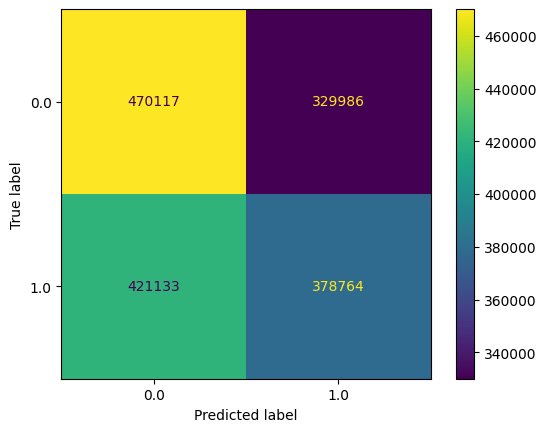

In [433]:
disp.plot()

              precision    recall  f1-score   support

         0.0       0.53      0.59      0.56    800103
         1.0       0.53      0.47      0.50    799897

    accuracy                           0.53   1600000
   macro avg       0.53      0.53      0.53   1600000
weighted avg       0.53      0.53      0.53   1600000



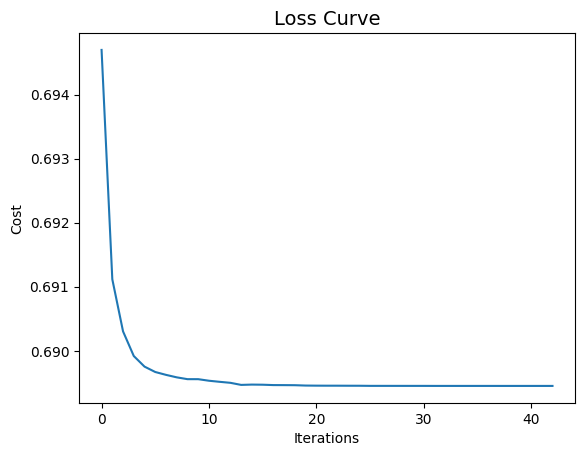

In [434]:
print(classification_report(Y_test, y_pred))

plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

### CLEAR X WIFI

#### CARREGAMENTO DOS DADOS:

In [435]:
X_2,Y_2 = processos(dados_clear, dados_wifi ,2)

print(X_2)
print(Y_2)

[[ 1.2207449e-04  1.2207449e-04]
 [ 2.4414898e-04 -6.1037244e-05]
 [-1.2207449e-04  6.1037244e-05]
 ...
 [ 2.1363035e-04 -3.0518622e-05]
 [-6.1037244e-05 -3.0518622e-05]
 [-3.0518622e-05 -9.1555863e-05]]
[1. 1. 0. ... 0. 0. 0.]


#### CONJUNTOS DE TREINAMENTO E TESTE:

In [436]:
X_2_train , X_2_test , Y_2_train , Y_2_test = train_test_split(X_2, Y_2, test_size=0.8)

#### NORMALIZAÇÃO DOS DADOS:

In [437]:
sc_2=StandardScaler()

scaler_2 = sc_2.fit(X_2_train)
trainX_2_scaled = scaler.transform(X_2_train)
testX_2_scaled = scaler.transform(X_2_test)

#### TREINAMENTO DO MODELO:

In [438]:
mlp_clf_2 = MLPClassifier(hidden_layer_sizes=(400,200,100,20), verbose= True , tol=0.000001,
                        max_iter = 100, activation = 'relu', shuffle=True, n_iter_no_change = 5,
                        solver = 'sgd', early_stopping=True, learning_rate= 'adaptive' 
                        )

mlp_clf_2.fit(trainX_2_scaled, Y_2_train)

Iteration 1, loss = 0.67783701
Validation score: 0.585650
Iteration 2, loss = 0.66513607
Validation score: 0.587825
Iteration 3, loss = 0.66360720
Validation score: 0.588200
Iteration 4, loss = 0.66314300
Validation score: 0.589275
Iteration 5, loss = 0.66292282
Validation score: 0.588050
Iteration 6, loss = 0.66280104
Validation score: 0.589025
Iteration 7, loss = 0.66271890
Validation score: 0.589075
Iteration 8, loss = 0.66266177
Validation score: 0.589025
Iteration 9, loss = 0.66262300
Validation score: 0.588650
Iteration 10, loss = 0.66259363
Validation score: 0.589350
Iteration 11, loss = 0.66258051
Validation score: 0.588175
Iteration 12, loss = 0.66254877
Validation score: 0.589650
Iteration 13, loss = 0.66253671
Validation score: 0.588675
Iteration 14, loss = 0.66251881
Validation score: 0.589300
Iteration 15, loss = 0.66250344
Validation score: 0.587750
Iteration 16, loss = 0.66248906
Validation score: 0.589275
Iteration 17, loss = 0.66249438
Validation score: 0.588125
Iterat

MLPClassifier(early_stopping=True, hidden_layer_sizes=(400, 200, 100, 20),
              learning_rate='adaptive', max_iter=100, n_iter_no_change=5,
              solver='sgd', tol=1e-06, verbose=True)

#### ACURÁCIA:

In [439]:
y_2_pred = mlp_clf_2.predict(testX_2_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(Y_2_test, y_2_pred)))

Accuracy: 0.59


#### MATRIZ DE CONFUSÃO:

In [440]:
cm_2 = confusion_matrix(Y_2_test, y_2_pred, labels=mlp_clf_2.classes_)

In [441]:
disp_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=mlp_clf_2.classes_)

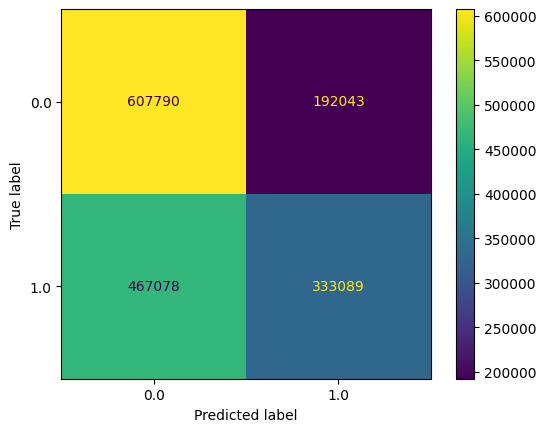

In [442]:
disp_2.plot()

              precision    recall  f1-score   support

         0.0       0.57      0.76      0.65    799833
         1.0       0.63      0.42      0.50    800167

    accuracy                           0.59   1600000
   macro avg       0.60      0.59      0.58   1600000
weighted avg       0.60      0.59      0.58   1600000



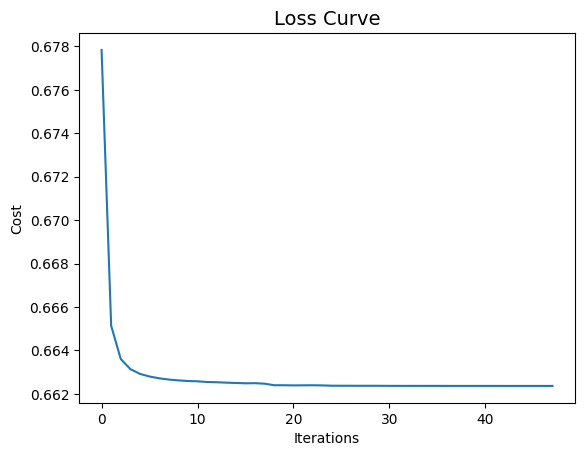

In [443]:
print(classification_report(Y_2_test, y_2_pred))

plt.plot(mlp_clf_2.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

### LTE X WIFI

#### CARREGAMENTO DOS DADOS:

In [444]:
X_3,Y_3 = processos(dados_lte1m, dados_wifi ,2)

print(X_3)
print(Y_3)

[[ 2.1363035e-04  9.1555863e-05]
 [ 3.0518622e-05  2.1363035e-04]
 [-3.0518623e-04 -6.1037244e-05]
 ...
 [ 6.1037244e-05 -2.1363035e-04]
 [ 6.1037244e-05  1.8311173e-04]
 [-1.2207449e-04 -6.1037244e-05]]
[1. 1. 1. ... 1. 0. 1.]


#### CONJUNTOS DE TREINAMENTO E TESTE:

In [445]:
X_3_train , X_3_test , Y_3_train , Y_3_test = train_test_split(X_3, Y_3, test_size=0.8)

#### NORMALIZAÇÃO DOS DADOS:

In [446]:
sc_3=StandardScaler()

scaler_3= sc_2.fit(X_3_train)
trainX_3_scaled = scaler.transform(X_3_train)
testX_3_scaled = scaler.transform(X_3_test)

#### TREINAMENTO DO MODELO:

In [447]:
mlp_clf_3 = MLPClassifier(hidden_layer_sizes=(400,200,100,20), verbose= True , tol=0.000001,
                        max_iter = 100, activation = 'relu', shuffle=True, n_iter_no_change = 5,
                        solver = 'sgd', early_stopping=True, learning_rate= 'adaptive' 
                        )

mlp_clf_3.fit(trainX_3_scaled, Y_3_train)

Iteration 1, loss = 0.68452911
Validation score: 0.556175
Iteration 2, loss = 0.68048738
Validation score: 0.560400
Iteration 3, loss = 0.67977242
Validation score: 0.560725
Iteration 4, loss = 0.67941571
Validation score: 0.561325
Iteration 5, loss = 0.67920064
Validation score: 0.561925
Iteration 6, loss = 0.67909382
Validation score: 0.561150
Iteration 7, loss = 0.67900549
Validation score: 0.560500
Iteration 8, loss = 0.67895379
Validation score: 0.560525
Iteration 9, loss = 0.67891735
Validation score: 0.561225
Iteration 10, loss = 0.67890040
Validation score: 0.560825
Iteration 11, loss = 0.67887329
Validation score: 0.561150
Validation score did not improve more than tol=0.000001 for 5 consecutive epochs. Setting learning rate to 0.000200
Iteration 12, loss = 0.67880781
Validation score: 0.561075
Iteration 13, loss = 0.67880298
Validation score: 0.561100
Iteration 14, loss = 0.67880016
Validation score: 0.561100
Iteration 15, loss = 0.67879465
Validation score: 0.561200
Iteratio

MLPClassifier(early_stopping=True, hidden_layer_sizes=(400, 200, 100, 20),
              learning_rate='adaptive', max_iter=100, n_iter_no_change=5,
              solver='sgd', tol=1e-06, verbose=True)

#### ACURÁCIA:

In [448]:
y_3_pred = mlp_clf_3.predict(testX_3_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(Y_3_test, y_3_pred)))

Accuracy: 0.56


#### MATRIZ DE CONFUSÃO:

In [449]:
cm_3 = confusion_matrix(Y_3_test, y_3_pred, labels=mlp_clf_3.classes_)

In [450]:
disp_3 = ConfusionMatrixDisplay(confusion_matrix=cm_3, display_labels=mlp_clf_3.classes_)

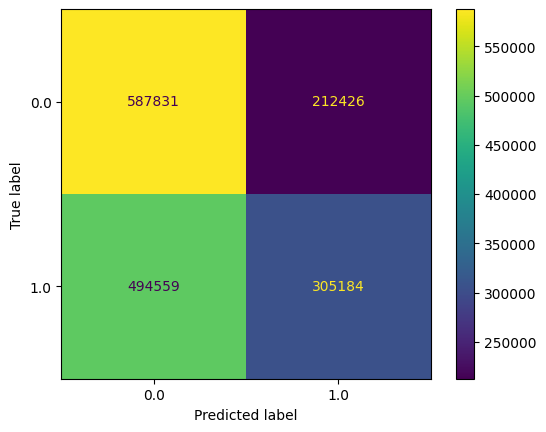

In [451]:
disp_3.plot()

              precision    recall  f1-score   support

         0.0       0.54      0.73      0.62    800257
         1.0       0.59      0.38      0.46    799743

    accuracy                           0.56   1600000
   macro avg       0.57      0.56      0.54   1600000
weighted avg       0.57      0.56      0.54   1600000



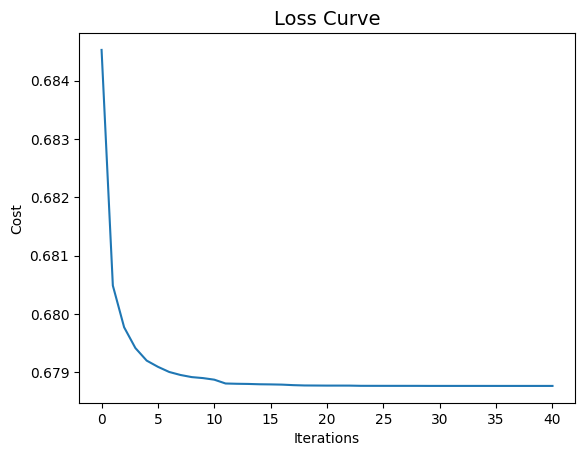

In [452]:
print(classification_report(Y_3_test, y_3_pred))

plt.plot(mlp_clf_3.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()